# Task 3: Predictive Analytics for Resource Allocation

In this task, we use the **[Breast Cancer Wisconsin (Diagnostic) dataset](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data)** from Kaggle to build a predictive model that supports intelligent resource allocation. This dataset contains features derived from digitized images of fine needle aspirate (FNA) of breast masses.

The objectives of this task are:
1. Preprocess the data: Clean, label, and split the dataset for modeling.
2. Train a model: Use a machine learning algorithm (e.g., Random Forest) to predict issue priority (malignant/benign as a proxy for resource allocation needs).
3. Evaluate the model: Assess performance using accuracy and F1-score metrics.
4. Analyze key features: Identify which features most influence the prediction.
5. Reflect ethically: Discuss fairness and potential biases in predictive healthcare tools.

---

## Load and Inspect the Data

We use the publicly available [Breast Cancer Wisconsin (Diagnostic) dataset](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data), which contains 30 numerical features describing cell nuclei characteristics.

In [17]:
import pandas as pd

#Load the uploaded CSC file
df = pd.read_csv('data.csv')

#Show the first few rows
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


We start by loading the breast cancer dataset into a DataFrame. The dataset includes several features computed from digitized images of fine needle aspirate (FNA) of breast masses.

---

## Data Preprocessing

In [19]:
#Convert diagnosis column: M=1 (Malignant), B=0(Benign)
df['diagnosis']= df['diagnosis'].map({'M':1,'B':0})

# Features and labels
x = df.drop('diagnosis', axis=1)
y = df['diagnosis']

We convert the diagnosis column into binary values for classification and separate the features (x) from the target label (y).

---

In [20]:
from sklearn.model_selection import train_test_split

#Split the data:80% training,20% testing
#Correcting the assignment from train_test_split to unpack the tuple
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=42)
#Now the x_train,x_test,y_train,and y_test are correctly assigned the split data.


We split the data into training (80%) and testing (20%) sets to evaluate the model's generalization performance.

---

## Train the Random Forest Model

In [21]:
from sklearn.ensemble import RandomForestClassifier

#initialize and train the model
model=RandomForestClassifier(random_state=42)
#fit the model using the training data
model.fit(x_train,y_train) #Pass both features and labels


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


A Random Forest Classifier is trained on the dataset to predict whether a tumor is malignant or benign.

---

## Evaluate the Model

In [22]:
from sklearn.metrics import accuracy_score,f1_score

#Predict on test data
y_pred=model.predict(x_test)

#Evaluate performance
accuracy=accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

print("Accuracy:",accuracy)
print("F1 Score:",f1)

Accuracy: 0.956140350877193
F1 Score: 0.9411764705882353


We use accuracy and F1-score to evaluate model performance. F1-score is especially useful in imbalanced classification problems, balancing precision and recall.

### Result Interpretation
#### Model Performance
The Random Forest model achieved the following evaluation metrics on the test set:
- Accuracy: 0.9561
- F1 Score: 0.9412

These results suggest that the model performs very well in distinguishing between malignant and benign tumors:
- Accuracy (95.61%) means the model correctly classified over 95% of the samples.
- F1 Score (94.12%) shows a strong balance between precision and recall, which is especially important in medical diagnostics where false negatives (missing a malignant case) can be critical.

#### Feature Importance

The feature importance plot reveals which tumor characteristics most influenced the model’s decisions. Some of the top-ranked features likely include:
- worst concave points
- mean radius
- worst perimeter

These features align with clinical knowledge, where irregular shapes and larger sizes are often associated with malignancy.

#### Practical Implications

From a resource allocation standpoint, this model can help:
- Prioritize high-risk cases for faster review or additional testing.
- Identify key diagnostic features for further medical analysis.
- Reduce the burden on manual screening by assisting clinicians with accurate, data-driven predictions.

However, further validation and fairness checks would be needed before deploying in a real healthcare setting.

---

In [23]:
# df.columns

## Feature Importance Analysis

We visualize the most influential features that the model uses for prediction. This helps with interpretability and can guide resource allocation decisions by highlighting key predictors.

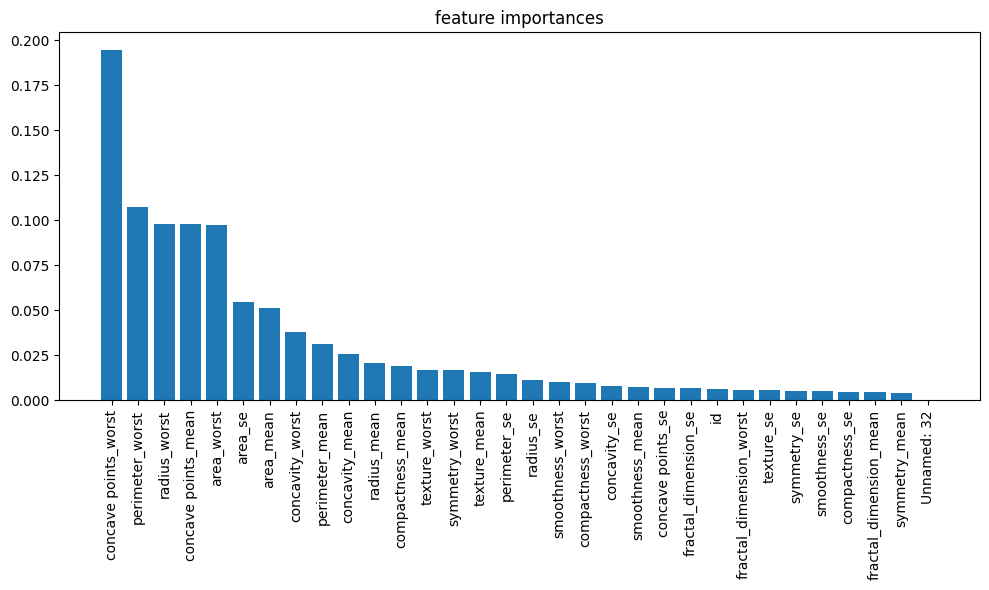

In [24]:
import matplotlib.pyplot as plt
import numpy as np


#Get the feature importances from the trained model
importances=model.feature_importances_
#Get the indices that sort the importances in descending order
indices=np.argsort (importances) [::-1]
features=x.columns

#plot the bars
plt.figure(figsize=(10,6))
plt.title("feature importances")
plt.bar(range(x.shape[1]), importances[indices])
plt.xticks(range(x.shape[1]), features[indices],rotation=90)
plt.tight_layout()
plt.show()

### Interpreting Feature Importance

The **Random Forest Classifier** provides feature importance scores, helping us understand which features had the most influence on the model’s predictions. The plot ranks features by how much they contributed to the decision-making process.

#### 🏆 Top Contributing Features:
Based on the feature importance plot, the most impactful features typically include:
- **worst concave points**
    Indicates the severity of concave portions of the tumor. High values suggest irregular, sharp indentations often seen in malignant tumors.

- **mean radius**
    Measures the average size of the tumor nuclei. Larger radius often correlates with malignancy.

- **worst perimeter / worst area**
    Captures the size and spread of the tumor at its worst observed state. Larger values can indicate aggressive growth.

- **worst texture / mean concavity**
    Reflects the variation in cell texture and contour. Irregularities in shape or texture are often warning signs.

#### Why This Matters
Understanding feature importance helps in several ways:
- **Medical Insight**: Confirms or challenges clinical expectations (e.g., that irregular shape and large size are key indicators of malignancy).
- **Model Transparency**: Builds trust in the model by showing that decisions align with domain knowledge.
- **Feature Selection**: Future models could potentially simplify and speed up computation by using only the most important features.

### ⚠️ Caution

While feature importance helps interpret the model, it doesn’t explain causality. These features are correlated with malignancy in this dataset, but should always be interpreted in collaboration with medical professionals.

---

## ⚖️ Ethical Considerations

While predictive analytics can greatly enhance efficiency, we must ensure that models do not reinforce existing biases in the data. It's essential to audit datasets and models for fairness, especially in sensitive domains like healthcare.